In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [4]:
#Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [5]:
#Split the data into train and test
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
#Initialize Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
#Predictions
y_pred = model.predict(X_test)

In [8]:
#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

Accuracy 0.9444444444444444


In [9]:
#Probabilities of classes
y_prob = model.predict_proba(X_test)

In [10]:
y_prob

array([[9.98054142e-01, 4.42551567e-04, 1.50330665e-03],
       [6.59416874e-06, 1.27925952e-06, 9.99992127e-01],
       [1.24934228e-03, 9.97720958e-01, 1.02969971e-03],
       [9.94246118e-01, 1.56500858e-03, 4.18887336e-03],
       [1.83045363e-03, 9.96699383e-01, 1.47016363e-03],
       [2.75741449e-02, 9.50702264e-01, 2.17235913e-02],
       [9.99915552e-01, 1.11016471e-05, 7.33468515e-05],
       [4.06815008e-04, 2.66848801e-04, 9.99326336e-01],
       [7.80790235e-03, 9.89059136e-01, 3.13296209e-03],
       [1.11410352e-03, 9.96880531e-01, 2.00536505e-03],
       [7.47947809e-02, 1.06913466e-02, 9.14513873e-01],
       [3.62337434e-04, 1.94805724e-02, 9.80157090e-01],
       [9.99994734e-01, 1.23506768e-07, 5.14232249e-06],
       [1.37539233e-01, 8.60753682e-01, 1.70708466e-03],
       [4.62495780e-04, 8.66093722e-05, 9.99450895e-01],
       [1.28753038e-05, 9.99934585e-01, 5.25393089e-05],
       [9.98874989e-01, 1.55536540e-04, 9.69474896e-04],
       [9.99999314e-01, 2.65694

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve((y_test == i), y_prob[:, i])
    roc_auc[i] = roc_auc_score((y_test == i), y_prob[:, i])

In [12]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.  , 0.  , 0.  , 0.05, 0.05, 1.  ]),
 2: array([0., 0., 0., 1.])}

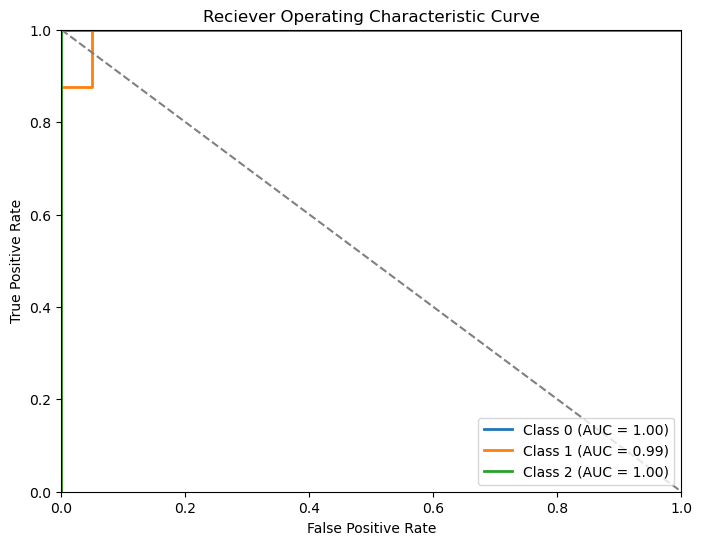

In [14]:
plt.figure(figsize=(8,6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1], [1,0], color='gray', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()